# Nominal / One Hot Encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.DataFrame({
    'color':['red','blue','green','green','red','blue'],
})

In [ ]:
df

,color
0,red
1,blue
2,green
3,green
4,red
5,blue


In [ ]:
# Create an instance of One Hot Encoder
encoder = OneHotEncoder()

In [ ]:
encoder.fit_transform(df[['color']]).toarray() # Colors sorted alphabetically, thus, blue 1st, green 2nd, red 3rd

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
encoded_color = encoder.fit_transform(df[['color']])

In [ ]:
encoded_color_df = pd.DataFrame(encoded_color.toarray(), columns=encoder.get_feature_names_out())

In [ ]:
pd.concat([df, encoded_color_df], axis=1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


In [ ]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('tips')

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Create an instance of One Hot Encoder
encoder = OneHotEncoder()

In [ ]:
encoder.fit_transform(df[['sex','smoker']])

<244x4 sparse matrix of type '<class 'numpy.float64'>'
	with 488 stored elements in Compressed Sparse Row format>

In [ ]:
encoded_sex_smoker_df = pd.DataFrame(encoder.fit_transform(df[['sex','smoker']]).toarray(), columns=encoder.get_feature_names_out())

In [ ]:
pd.concat([df, encoded_sex_smoker_df],axis=1)

,total_bill,tip,sex,smoker,day,time,size,sex_Female,sex_Male,smoker_No,smoker_Yes
0,16.99,1.01,Female,No,Sun,Dinner,2,1.0,0.0,1.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,0.0,1.0,1.0,0.0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.0,1.0,1.0,0.0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.0,1.0,1.0,0.0
4,24.59,3.61,Female,No,Sun,Dinner,4,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.0,1.0,1.0,0.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1.0,0.0,0.0,1.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.0,1.0,0.0,1.0
242,17.82,1.75,Male,No,Sat,Dinner,2,0.0,1.0,1.0,0.0


# Label and Ordinal Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.DataFrame({
    'color':['red','blue','green','green','red','blue'],
})

In [ ]:
# Label Encoding
encoder = LabelEncoder()

In [ ]:
encoder.fit_transform(df['color'])

array([2, 0, 1, 1, 2, 0])

In [ ]:
# Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

# Sample dataframe with an ordinal value
df = pd.DataFrame({
    'size':['small','medium','large','medium','small','large'],
})

In [ ]:
# Create an instance of the OrdinalEncoder class and fit_transform
encoder = OrdinalEncoder(categories=[['small', 'medium', 'large']])

In [ ]:
encoder.fit_transform(df[['size']])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

# Target Guided Ordinal Encoding
It is a technique used to encode categorical variables based on their relationship with the target variable. This encoding technique is useful when we have a categorical variable with a large number of unique categories, and we want to use this variable as a feature in our machine learning model.

In Target Guided Ordinal Encoding, we replace each category in the categorical variable with a numerical value based on the mean or median of the target variable for that category. This creates a monotonic relationship between the categorical variable and the target variable, which can improve the predictive power of our model.

In [ ]:
df= pd.DataFrame({
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'],
    'price': [200, 150, 300, 250, 180, 320]
})

In [ ]:
df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180
5,Paris,320


In [ ]:
# Calculate the mean price for each city
mean_price = df.groupby('city')['price'].mean().to_dict()
mean_price

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [ ]:
 # Replace each city with its mean price
df['city_encoded'] = df['city'].map(mean_price)
df

,city,price,city_encoded
0,New York,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New York,180,190.0
5,Paris,320,310.0


In [ ]:
import seaborn as sns

df = sns.load_dataset('tips')

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: >

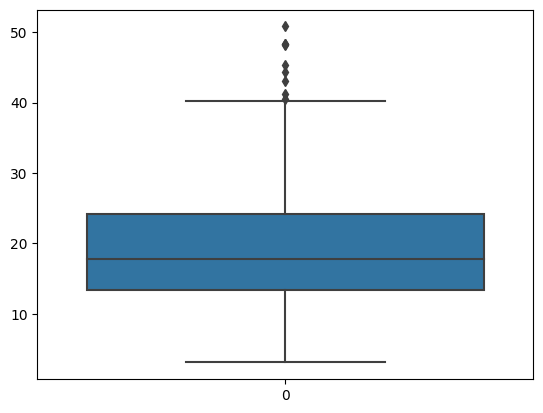

In [ ]:
sns.boxplot(df['total_bill'])

In [ ]:
median = df.groupby('day')['total_bill'].median().to_dict()
median

{'Thur': 16.2, 'Fri': 15.38, 'Sat': 18.24, 'Sun': 19.63}

In [ ]:
df['day_encoded'] = df['day'].map(median)

In [ ]:
df

,total_bill,tip,sex,smoker,day,time,size,day_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2,19.63
1,10.34,1.66,Male,No,Sun,Dinner,3,19.63
2,21.01,3.50,Male,No,Sun,Dinner,3,19.63
3,23.68,3.31,Male,No,Sun,Dinner,2,19.63
4,24.59,3.61,Female,No,Sun,Dinner,4,19.63
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,18.24
240,27.18,2.00,Female,Yes,Sat,Dinner,2,18.24
241,22.67,2.00,Male,Yes,Sat,Dinner,2,18.24
242,17.82,1.75,Male,No,Sat,Dinner,2,18.24
